In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("quoratrain.csv")

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
# missing values
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
# duplicate rows
df.duplicated().sum()

0

In [8]:
df.is_duplicate.value_counts(normalize=True)
# Data is unbalanced

0    0.630802
1    0.369198
Name: is_duplicate, dtype: float64

<AxesSubplot:ylabel='is_duplicate'>

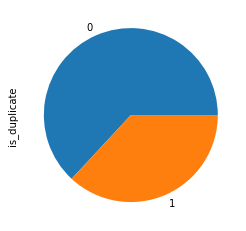

In [9]:
df.is_duplicate.value_counts(normalize=True).plot(kind='pie')

In [10]:
# Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of unique questions: ",np.unique(qid).shape[0])

Number of unique questions:  537933


In [11]:
x = qid.value_counts()>1
print("Number of questions getting repeated:",x[x].shape[0])

Number of questions getting repeated: 111780


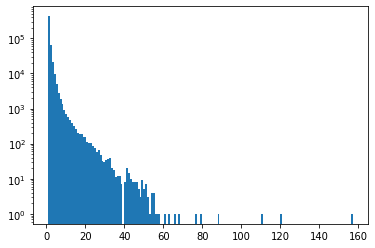

In [12]:
# Repeated questions Histogram
plt.hist(qid.value_counts().values,bins=160);
plt.yscale('log')
plt.show()

In [13]:
# We will take subset of the data

In [14]:
new_df = df.sample(30000)

In [15]:
new_df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 161859 to 272918
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
161859,161859,252100,252101,Why doesn't Tinder show my matches?,My Tinder photos are not loading. I can't see ...,0
133709,133709,213851,150680,What are some examples of service businesses?,What are some examples of a service business?,1
318753,318753,444143,444144,Why is Requiem for a Dream so depressing?,What is the best step to start a career in IT ...,0
134186,134186,214523,214524,How do you know when a software developer is a...,When does a software developer become a senior...,1
44432,44432,79736,79737,Which is the best Oracle training institute in...,Which is the Best oracle training institute in...,1


In [18]:
def preprocess(q):
    q = str(q).lower().strip()
    
    # Replacing certain characters with their string equivalant
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []
    
    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q    

In [19]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [20]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [21]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
161859,161859,252100,252101,Why doesn't Tinder show my matches?,My Tinder photos are not loading. I can't see ...,0,35,102,6,21
133709,133709,213851,150680,What are some examples of service businesses?,What are some examples of a service business?,1,45,45,7,8
318753,318753,444143,444144,Why is Requiem for a Dream so depressing?,What is the best step to start a career in IT ...,0,41,58,8,12
134186,134186,214523,214524,How do you know when a software developer is a...,When does a software developer become a senior...,1,73,66,13,10
44432,44432,79736,79737,Which is the best Oracle training institute in...,Which is the Best oracle training institute in...,1,64,57,10,9


In [22]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [23]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
161859,161859,252100,252101,Why doesn't Tinder show my matches?,My Tinder photos are not loading. I can't see ...,0,35,102,6,21,2
133709,133709,213851,150680,What are some examples of service businesses?,What are some examples of a service business?,1,45,45,7,8,6
318753,318753,444143,444144,Why is Requiem for a Dream so depressing?,What is the best step to start a career in IT ...,0,41,58,8,12,2
134186,134186,214523,214524,How do you know when a software developer is a...,When does a software developer become a senior...,1,73,66,13,10,6
44432,44432,79736,79737,Which is the best Oracle training institute in...,Which is the Best oracle training institute in...,1,64,57,10,9,8


In [24]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [25]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
161859,161859,252100,252101,Why doesn't Tinder show my matches?,My Tinder photos are not loading. I can't see ...,0,35,102,6,21,2,24
133709,133709,213851,150680,What are some examples of service businesses?,What are some examples of a service business?,1,45,45,7,8,6,15
318753,318753,444143,444144,Why is Requiem for a Dream so depressing?,What is the best step to start a career in IT ...,0,41,58,8,12,2,20
134186,134186,214523,214524,How do you know when a software developer is a...,When does a software developer become a senior...,1,73,66,13,10,6,19
44432,44432,79736,79737,Which is the best Oracle training institute in...,Which is the Best oracle training institute in...,1,64,57,10,9,8,19


In [26]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
161859,161859,252100,252101,Why doesn't Tinder show my matches?,My Tinder photos are not loading. I can't see ...,0,35,102,6,21,2,24,0.08
133709,133709,213851,150680,What are some examples of service businesses?,What are some examples of a service business?,1,45,45,7,8,6,15,0.40
318753,318753,444143,444144,Why is Requiem for a Dream so depressing?,What is the best step to start a career in IT ...,0,41,58,8,12,2,20,0.10
134186,134186,214523,214524,How do you know when a software developer is a...,When does a software developer become a senior...,1,73,66,13,10,6,19,0.32
44432,44432,79736,79737,Which is the best Oracle training institute in...,Which is the Best oracle training institute in...,1,64,57,10,9,8,19,0.42


In [30]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [31]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [32]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
161859,161859,252100,252101,Why doesn't Tinder show my matches?,My Tinder photos are not loading. I can't see ...,0,35,102,6,21,...,24,0.08,0.249994,0.076922,0.499975,0.166664,0.333328,0.095238,0,0
133709,133709,213851,150680,What are some examples of service businesses?,What are some examples of a service business?,1,45,45,7,8,...,15,0.40,0.749981,0.749981,0.999967,0.749981,0.857131,0.749991,0,1
318753,318753,444143,444144,Why is Requiem for a Dream so depressing?,What is the best step to start a career in IT ...,0,41,58,8,12,...,20,0.10,0.000000,0.000000,0.499988,0.399992,0.249997,0.166665,0,0
134186,134186,214523,214524,How do you know when a software developer is a...,When does a software developer become a senior...,1,73,66,13,10,...,19,0.32,0.666656,0.666656,0.499975,0.199996,0.499995,0.384612,1,0
44432,44432,79736,79737,Which is the best Oracle training institute in...,Which is the Best oracle training institute in...,1,64,57,10,9,...,19,0.42,0.499992,0.428565,0.999967,0.999967,0.666659,0.599994,0,1


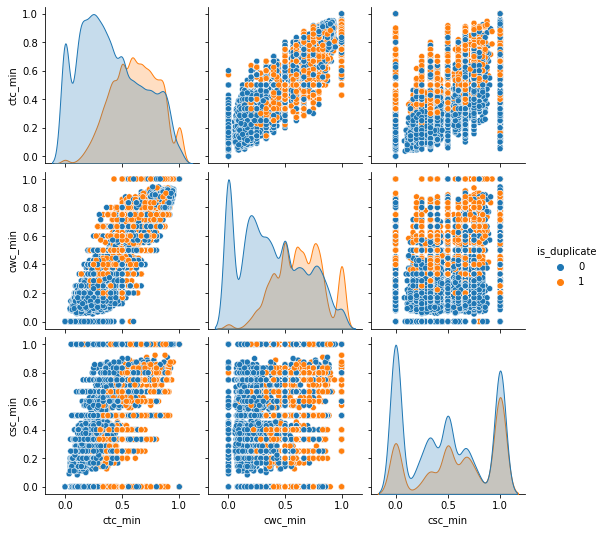

In [159]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

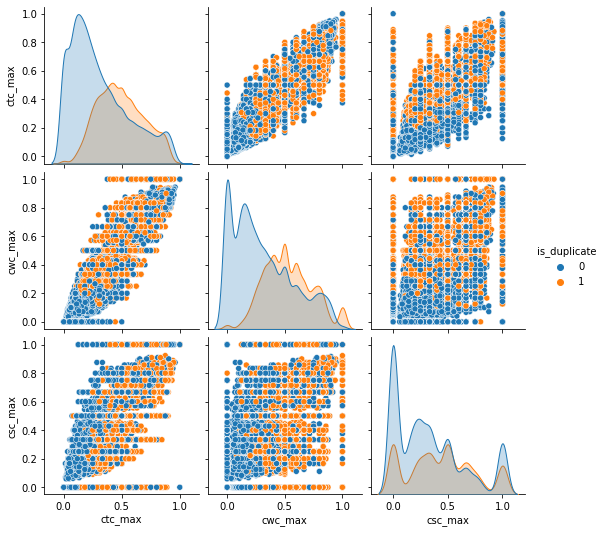

In [160]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

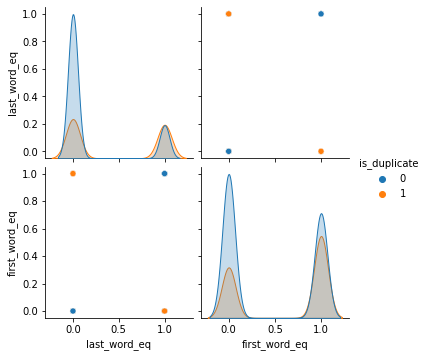

In [161]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

In [39]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
161859,Why doesn't Tinder show my matches?,My Tinder photos are not loading. I can't see ...
133709,What are some examples of service businesses?,What are some examples of a service business?
318753,Why is Requiem for a Dream so depressing?,What is the best step to start a career in IT ...
134186,How do you know when a software developer is a...,When does a software developer become a senior...
44432,Which is the best Oracle training institute in...,Which is the Best oracle training institute in...


In [40]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 16)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
161859,0,35,102,6,21,2,24,0.08,0.249994,0.076922,0.499975,0.166664,0.333328,0.095238,0,0
133709,1,45,45,7,8,6,15,0.40,0.749981,0.749981,0.999967,0.749981,0.857131,0.749991,0,1
318753,0,41,58,8,12,2,20,0.10,0.000000,0.000000,0.499988,0.399992,0.249997,0.166665,0,0
134186,1,73,66,13,10,6,19,0.32,0.666656,0.666656,0.499975,0.199996,0.499995,0.384612,1,0
44432,1,64,57,10,9,8,19,0.42,0.499992,0.428565,0.999967,0.999967,0.666659,0.599994,0,1


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [42]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [43]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6016)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
161859,0,35,102,6,21,2,24,0.08,0.249994,0.076922,...,0,0,0,0,0,0,0,0,0,0
133709,1,45,45,7,8,6,15,0.40,0.749981,0.749981,...,0,0,0,0,0,0,0,0,0,0
318753,0,41,58,8,12,2,20,0.10,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
134186,1,73,66,13,10,6,19,0.32,0.666656,0.666656,...,0,0,0,0,0,0,0,0,0,0
44432,1,64,57,10,9,8,19,0.42,0.499992,0.428565,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7873333333333333

In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7845

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3171,  577],
       [ 699, 1553]], dtype=int64)

In [49]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3066,  682],
       [ 611, 1641]], dtype=int64)

In [50]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [51]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [52]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [56]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    return np.hstack((np.array(input_query).reshape(1,15),q1_bow,q2_bow))

In [57]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [59]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)

In [189]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))